In [62]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [63]:
original_data = pd.read_csv('Ecommerce.csv')

### Get rid of non-numerical columns of the dataset

In [64]:
only_numeric_df = original_data.select_dtypes(['number'])

### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

In [65]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import numpy as np

def plot_subplots(df, target_col, subplot_cols=2):
    features = df.columns.drop(target_col)
    matrix = np.array(features.to_list()).reshape(-1, subplot_cols)
    rows = matrix.shape[0]
    fig = make_subplots(rows=rows, cols=subplot_cols)
    for feature in features:
        i,j = np.where(matrix==feature)
        row=int(i)+1
        col=int(j)+1
        fig.add_trace(go.Scatter(x=df[feature], y=df[target_col],mode='markers'), row=row, col=col)
        fig.update_xaxes(title_text=feature, row=row, col=col)
        fig.update_yaxes(title_text=target_col, row=row, col=col)
    
    fig.update_layout(height=rows*400, width=subplot_cols*400, title_text='Relationships between features and target')
    fig.show()

target_col = 'Yearly Amount Spent'
plot_subplots(only_numeric_df, target_col)

### Leave only one feature that has a linear relationship with the target variable.

In [66]:
def get_best_feature(df, target_col):
    features = df.columns.drop(target_col)
    corr = {feature: df[[feature, target_col]].corr().iloc[1,0] for feature in features}
    return max(corr, key=lambda x: abs(corr.get(x)))

best_feature = get_best_feature(only_numeric_df, target_col)
best_feature_df = df[[best_feature, target_col]]

### Divide the dataset into training and test sets with the ratio 80:20.

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(best_feature_df['Length of Membership'], best_feature_df['Yearly Amount Spent'], test_size=0.2)


### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [68]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    
    #resetting indexes of input data
    data_vector.reset_index(drop=True, inplace=True)
    response_vector.reset_index(drop=True, inplace=True)

    
    #by general formula: beta = inverse_of(X_transp * X) * X_transp * Y
    
    #creating X matrix
    ones = pd.Series(np.ones(len(X_train)))
    X = pd.concat([ones, data_vector], axis=1)
    
    #reseting column's index
    X.columns = range(X.shape[1])

    # transposed X
    X_tr = X.transpose()

    # X_tr * X
    tmp1 = X_tr.dot(X)
    tmp1.reset_index(drop=True, inplace=True)

    # inversing (X_tr * X)
    df_inv = pd.DataFrame(np.linalg.inv(tmp1.values))
    
    # finally output = inverse_of((X_transp * X)) * X_transp * Y
    result = df_inv.dot(X_tr).dot(response_vector)
    
    
    return result.values

In [69]:
beta = fit_1d_linear_regression(X_train, y_train)

In [70]:
def predict(beta, X):
    b0,b1 = beta
    return b0+b1*X

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [71]:
def plot_fitted_line(b0,
                     b1,
                     x,
                     y,
                     username: str):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    
    x1,x2 = x.min(), x.max()
    y1, y2= predict((b0,b1),np.array([x1,x2]))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x.to_list(), y=y.to_list(), name='Observed values', mode='markers', marker={'color':'red'}))
    fig.add_trace(go.Scatter(x=[x1,x2], y=[y1,y2], name='Regression line',marker={'color':'black'}))
    fig.show()

plot_fitted_line(*beta, X_train, y_train,'Username?')






### Plot example

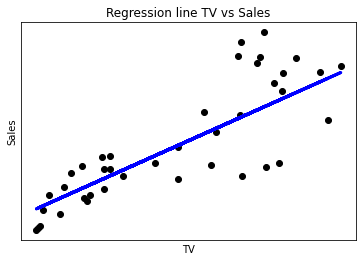

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [72]:
# PLEASE INSTALL PRETTYTABLE IF YOU HAVE NOT IT ALREADY
from prettytable import PrettyTable

In [73]:

from sklearn.linear_model import LinearRegression
sklearn_clf = LinearRegression().fit(pd.DataFrame(X_train), y_train)

t = PrettyTable(['','My clf', 'Sklearn clf'])
t.add_row(['b0', beta[0], sklearn_clf.intercept_])
t.add_row(['b1', beta[1], sklearn_clf.coef_[0]])
print(t)

+----+-------------------+------------------+
|    |       My clf      |   Sklearn clf    |
+----+-------------------+------------------+
| b0 | 265.6054243099652 | 265.605424309965 |
| b1 |  65.9139404686992 | 65.9139404686992 |
+----+-------------------+------------------+


### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
my_y_pred = predict(beta, X_test)
sklearn_y_pred = sklearn_clf.predict(pd.DataFrame(X_test))

t = PrettyTable(['Metrics','My clf', 'Sklearn clf'])
t.add_row(['MAE', mean_absolute_error(y_test,my_y_pred), mean_absolute_error(y_test,sklearn_y_pred)])
t.add_row(['MSE', mean_squared_error(y_test,my_y_pred, squared=True), mean_squared_error(y_test,sklearn_y_pred, squared=True)])
t.add_row(['RMSE', mean_squared_error(y_test,my_y_pred, squared=False), mean_squared_error(y_test,sklearn_y_pred, squared=False)])
t.add_row(['R-squared', r2_score(y_test,my_y_pred), r2_score(y_test,sklearn_y_pred)])
print(t)

#INTERPRETING METRIC RESULTS:
#From r-squared we see that both models don't have strong fitting strength
#This also can be proven by ratio of MAE / df['Yearly Amount Spent'].mean(), i.e. 33/499, which is quite big number

+-----------+--------------------+--------------------+
|  Metrics  |       My clf       |    Sklearn clf     |
+-----------+--------------------+--------------------+
|    MAE    | 37.90810791027926  | 37.908107910279256 |
|    MSE    | 2233.7164379759242 | 2233.716437975926  |
|    RMSE   | 47.262209406416076 |  47.2622094064161  |
| R-squared | 0.5798760631479803 |  0.57987606314798  |
+-----------+--------------------+--------------------+


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [75]:
only_numeric_df
target_col = 'Yearly Amount Spent'
X_train2, X_test2, y_train2, y_test2 = train_test_split(only_numeric_df[only_numeric_df.columns.difference([target_col])],
                                                    only_numeric_df[target_col], test_size=0.2)
extended_clf = LinearRegression().fit(X_train2, y_train2)
y_pred_ext = extended_clf.predict(X_test2)
t = PrettyTable(['Metrics','My clf', 'Extended clf'])
t.add_row(['MAE', mean_absolute_error(y_test,my_y_pred), mean_absolute_error(y_test2,y_pred_ext)])
t.add_row(['MSE', mean_squared_error(y_test,my_y_pred, squared=True), mean_squared_error(y_test2,y_pred_ext, squared=True)])
t.add_row(['RMSE', mean_squared_error(y_test,my_y_pred, squared=False), mean_squared_error(y_test2,y_pred_ext, squared=False)])
t.add_row(['R-squared', r2_score(y_test,my_y_pred), r2_score(y_test2,y_pred_ext)])
print(t)

#INTERPRETING METRIC RESULTS:
#From output we see that after including rest numeric columns we get significant improvement of fitting strength
# P.S. That was surprise for me, because I thought, better to leave one good feature and drop not so good features

+-----------+--------------------+--------------------+
|  Metrics  |       My clf       |    Extended clf    |
+-----------+--------------------+--------------------+
|    MAE    | 37.90810791027926  | 6.835361648615155  |
|    MSE    | 2233.7164379759242 | 70.68093842983866  |
|    RMSE   | 47.262209406416076 | 8.407195634088614  |
| R-squared | 0.5798760631479803 | 0.9889637805884403 |
+-----------+--------------------+--------------------+
